In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
def SIS_analytical(i0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    R0 = beta / gamma
    
    numerator = 1 - (1 / R0)
    denominator = 1 + ((1 - 1/R0 - i0) / i0) * np.exp(-(beta - gamma) * T)

    return numerator/denominator, T

In [25]:
def SIS_forward_Euler(s0,i0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    s = np.zeros(len(T))
    i = np.zeros(len(T))
    n = s0+i0
    
    for idx,t in enumerate(T):
        if idx==0:
            s[idx] = s0
            i[idx] = i0
        else:
            ds_dt = -beta * s[idx-1] * i[idx-1] + gamma * i[idx-1] 
            di_dt = beta * s[idx-1] * i[idx-1] - gamma * i[idx-1]
            
            s[idx] = s[idx-1] + ds_dt * stepsize
            i[idx] = i[idx-1] + di_dt * stepsize
    
    return s, i, T

## Plotting with Different Timestep Sizes

In [26]:
timestep_variations = [2, 1, .5]
SIS_dict = dict.fromkeys(timestep_variations)

analytical = SIS_analytical(0.01, 3, 2, 25, .5)

for t in timestep_variations:
    SIS_dict[t] = SIS_forward_Euler(
        s0=0.99,
        i0=0.01,
        beta=3,
        gamma=2,
        t_max=25,
        stepsize=t
    )

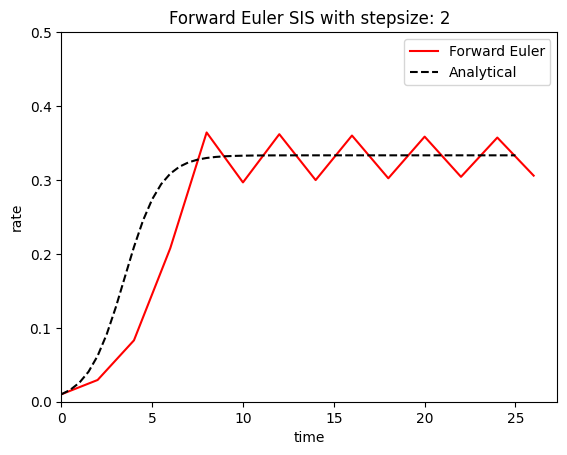

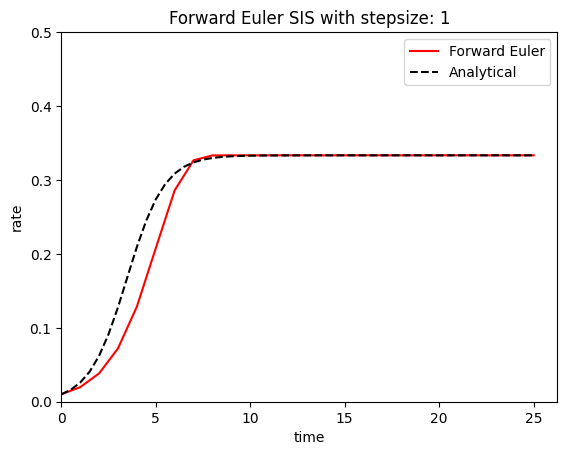

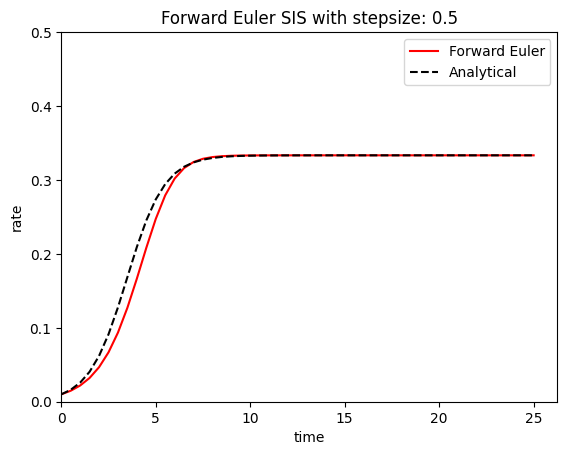

In [28]:
for key in SIS_dict:
    fig, ax = plt.subplots()
    ax.plot(SIS_dict[key][2],SIS_dict[key][1], color='r', label='Forward Euler')
    ax.plot(analytical[1],analytical[0], 'k--', label='Analytical')
    ax.set_xlabel('time')
    ax.set_ylabel('rate')
    ax.legend()
    ax.set_ylim(bottom=0, top=.5)
    ax.set_xlim(left=0)
    
    ax.set_title(f'Forward Euler SIS with stepsize: {key}')

In [31]:
def max_timestep_error(stepsize):
    _, i, _ = SIS_forward_Euler(
        s0=0.99,
        i0=0.01,
        beta=3,
        gamma=2,
        t_max=25,
        stepsize=stepsize
    )

    i_analytical, _ = SIS_analytical(
        i0=0.01,
        beta=3,
        gamma=2,
        t_max=25,
        stepsize=stepsize
    )

    E = np.max(np.abs(i - i_analytical))
    return E

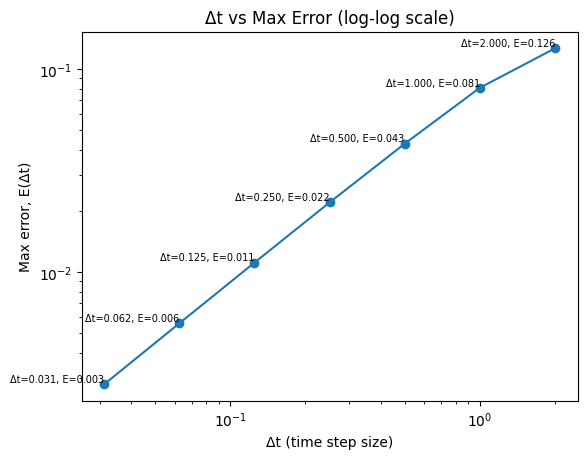

In [44]:
dt_values = np.array([2, 1, 1/2, 1/4, 1/8, 1/16, 1/32])
E_values = [max_timestep_error(dt) for dt in dt_values]

plt.loglog(dt_values, E_values, 'o-', label='Max error vs Δt')

plt.xlabel('Δt (time step size)')
plt.ylabel('Max error, E(Δt)')
plt.title('Δt vs Max Error (log-log scale)')

for x, y in zip(dt_values, E_values):
    plt.text(x, y, f'Δt={x:.3f}, E={y:.3f}', fontsize=7, ha='right', va='bottom')